In [1]:
#Path 문제 해결
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/NVIDIA GPU Computing Toolkit/CUDA/v9.0/bin'
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [23]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.layers import LSTM
# 랜덤시드 고정시키기
np.random.seed(5)

In [10]:
import keras

In [11]:
class LossHistory(keras.callbacks.Callback):
    def init(self):
        self.losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))


In [3]:
code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}

idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a4', 6:'b4',
            7:'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8'}

In [4]:
import numpy as np

def seq2dataset(seq, window_size):
    dataset = []
    for i in range(len(seq)-window_size):
        subset = seq[i:(i+window_size+1)]
        dataset.append([code2idx[item] for item in subset])
    return np.array(dataset)

In [5]:
seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

dataset = seq2dataset(seq, window_size = 4)

print(dataset.shape)
print(dataset)

(50, 5)
[[11  9  2 10  8]
 [ 9  2 10  8  1]
 [ 2 10  8  1  7]
 [10  8  1  7  8]
 [ 8  1  7  8  9]
 [ 1  7  8  9 10]
 [ 7  8  9 10 11]
 [ 8  9 10 11 11]
 [ 9 10 11 11  4]
 [10 11 11  4 11]
 [11 11  4 11  9]
 [11  4 11  9  9]
 [ 4 11  9  9  9]
 [11  9  9  9 10]
 [ 9  9  9 10  8]
 [ 9  9 10  8  1]
 [ 9 10  8  1  7]
 [10  8  1  7  9]
 [ 8  1  7  9 11]
 [ 1  7  9 11 11]
 [ 7  9 11 11  9]
 [ 9 11 11  9  9]
 [11 11  9  9  2]
 [11  9  9  2  8]
 [ 9  9  2  8  8]
 [ 9  2  8  8  8]
 [ 2  8  8  8  8]
 [ 8  8  8  8  8]
 [ 8  8  8  8  9]
 [ 8  8  8  9  3]
 [ 8  8  9  3  9]
 [ 8  9  3  9  9]
 [ 9  3  9  9  9]
 [ 3  9  9  9  9]
 [ 9  9  9  9  9]
 [ 9  9  9  9 10]
 [ 9  9  9 10  4]
 [ 9  9 10  4 11]
 [ 9 10  4 11  9]
 [10  4 11  9  2]
 [ 4 11  9  2 10]
 [11  9  2 10  8]
 [ 9  2 10  8  1]
 [ 2 10  8  1  7]
 [10  8  1  7  9]
 [ 8  1  7  9 11]
 [ 1  7  9 11 11]
 [ 7  9 11 11  9]
 [ 9 11 11  9  9]
 [11 11  9  9  2]]


In [12]:
# 입력(X)과 출력(Y) 변수로 분리하기
x_train = dataset[:,0:4]
y_train = dataset[:,4]

max_idx_value = 13

# 입력값 정규화 시키기
x_train = x_train / float(max_idx_value)

# 라벨값에 대한 one-hot 인코딩 수행
y_train = np_utils.to_categorical(y_train)

one_hot_vec_size = y_train.shape[1]

print("one hot encoding vector size is ", one_hot_vec_size)

one hot encoding vector size is  12


In [13]:
# 3. 모델 구성하기
model = Sequential()
model.add(Dense(128, input_dim=4, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(one_hot_vec_size, activation='softmax'))

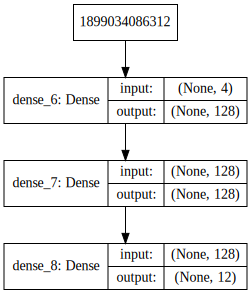

In [21]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [14]:
# 4. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
history = LossHistory() # 손실 이력 객체 생성
history.init()

In [16]:
# 5. 모델 학습시키기
model.fit(x_train, y_train, epochs=2000, batch_size=10, verbose=2, callbacks=[history])

Epoch 1/2000
 - 0s - loss: 2.4689 - acc: 0.2200
Epoch 2/2000
 - 0s - loss: 2.3613 - acc: 0.3400
Epoch 3/2000
 - 0s - loss: 2.2763 - acc: 0.3400
Epoch 4/2000
 - 0s - loss: 2.1970 - acc: 0.3400
Epoch 5/2000
 - 0s - loss: 2.1172 - acc: 0.3400
Epoch 6/2000
 - 0s - loss: 2.0562 - acc: 0.3400
Epoch 7/2000
 - 0s - loss: 1.9933 - acc: 0.3400
Epoch 8/2000
 - 0s - loss: 1.9594 - acc: 0.3400
Epoch 9/2000
 - 0s - loss: 1.9286 - acc: 0.3400
Epoch 10/2000
 - 0s - loss: 1.9102 - acc: 0.3400
Epoch 11/2000
 - 0s - loss: 1.8918 - acc: 0.3400
Epoch 12/2000
 - 0s - loss: 1.8813 - acc: 0.3400
Epoch 13/2000
 - 0s - loss: 1.8642 - acc: 0.3400
Epoch 14/2000
 - 0s - loss: 1.8484 - acc: 0.3400
Epoch 15/2000
 - 0s - loss: 1.8318 - acc: 0.3400
Epoch 16/2000
 - 0s - loss: 1.8205 - acc: 0.3400
Epoch 17/2000
 - 0s - loss: 1.8100 - acc: 0.3400
Epoch 18/2000
 - 0s - loss: 1.7977 - acc: 0.3400
Epoch 19/2000
 - 0s - loss: 1.7844 - acc: 0.3400
Epoch 20/2000
 - 0s - loss: 1.7777 - acc: 0.3400
Epoch 21/2000
 - 0s - loss: 1

Epoch 168/2000
 - 0s - loss: 1.2555 - acc: 0.5600
Epoch 169/2000
 - 0s - loss: 1.2550 - acc: 0.5600
Epoch 170/2000
 - 0s - loss: 1.2567 - acc: 0.5600
Epoch 171/2000
 - 0s - loss: 1.2514 - acc: 0.5400
Epoch 172/2000
 - 0s - loss: 1.2489 - acc: 0.5400
Epoch 173/2000
 - 0s - loss: 1.2387 - acc: 0.5600
Epoch 174/2000
 - 0s - loss: 1.2387 - acc: 0.5600
Epoch 175/2000
 - 0s - loss: 1.2426 - acc: 0.5600
Epoch 176/2000
 - 0s - loss: 1.2366 - acc: 0.5600
Epoch 177/2000
 - 0s - loss: 1.2317 - acc: 0.5600
Epoch 178/2000
 - 0s - loss: 1.2322 - acc: 0.5400
Epoch 179/2000
 - 0s - loss: 1.2337 - acc: 0.5600
Epoch 180/2000
 - 0s - loss: 1.2250 - acc: 0.5600
Epoch 181/2000
 - 0s - loss: 1.2263 - acc: 0.5600
Epoch 182/2000
 - 0s - loss: 1.2250 - acc: 0.5400
Epoch 183/2000
 - 0s - loss: 1.2229 - acc: 0.5600
Epoch 184/2000
 - 0s - loss: 1.2185 - acc: 0.5600
Epoch 185/2000
 - 0s - loss: 1.2182 - acc: 0.5600
Epoch 186/2000
 - 0s - loss: 1.2145 - acc: 0.5400
Epoch 187/2000
 - 0s - loss: 1.2079 - acc: 0.5400


Epoch 332/2000
 - 0s - loss: 0.9696 - acc: 0.6400
Epoch 333/2000
 - 0s - loss: 0.9619 - acc: 0.6400
Epoch 334/2000
 - 0s - loss: 0.9679 - acc: 0.6000
Epoch 335/2000
 - 0s - loss: 0.9712 - acc: 0.6000
Epoch 336/2000
 - 0s - loss: 0.9616 - acc: 0.6400
Epoch 337/2000
 - 0s - loss: 0.9626 - acc: 0.6200
Epoch 338/2000
 - 0s - loss: 0.9645 - acc: 0.6200
Epoch 339/2000
 - 0s - loss: 0.9650 - acc: 0.6200
Epoch 340/2000
 - 0s - loss: 0.9518 - acc: 0.6200
Epoch 341/2000
 - 0s - loss: 0.9601 - acc: 0.6000
Epoch 342/2000
 - 0s - loss: 0.9590 - acc: 0.6400
Epoch 343/2000
 - 0s - loss: 0.9512 - acc: 0.6200
Epoch 344/2000
 - 0s - loss: 0.9524 - acc: 0.6200
Epoch 345/2000
 - 0s - loss: 0.9559 - acc: 0.6200
Epoch 346/2000
 - 0s - loss: 0.9478 - acc: 0.6400
Epoch 347/2000
 - 0s - loss: 0.9498 - acc: 0.6200
Epoch 348/2000
 - 0s - loss: 0.9599 - acc: 0.6400
Epoch 349/2000
 - 0s - loss: 0.9427 - acc: 0.6200
Epoch 350/2000
 - 0s - loss: 0.9417 - acc: 0.5800
Epoch 351/2000
 - 0s - loss: 0.9422 - acc: 0.6000


Epoch 496/2000
 - 0s - loss: 0.7824 - acc: 0.7400
Epoch 497/2000
 - 0s - loss: 0.7780 - acc: 0.7400
Epoch 498/2000
 - 0s - loss: 0.7763 - acc: 0.7400
Epoch 499/2000
 - 0s - loss: 0.7815 - acc: 0.7600
Epoch 500/2000
 - 0s - loss: 0.7810 - acc: 0.7600
Epoch 501/2000
 - 0s - loss: 0.7751 - acc: 0.7800
Epoch 502/2000
 - 0s - loss: 0.7801 - acc: 0.7200
Epoch 503/2000
 - 0s - loss: 0.7761 - acc: 0.7400
Epoch 504/2000
 - 0s - loss: 0.7734 - acc: 0.7800
Epoch 505/2000
 - 0s - loss: 0.7764 - acc: 0.7400
Epoch 506/2000
 - 0s - loss: 0.7841 - acc: 0.7200
Epoch 507/2000
 - 0s - loss: 0.7739 - acc: 0.7400
Epoch 508/2000
 - 0s - loss: 0.7757 - acc: 0.7000
Epoch 509/2000
 - 0s - loss: 0.7650 - acc: 0.7600
Epoch 510/2000
 - 0s - loss: 0.7659 - acc: 0.7800
Epoch 511/2000
 - 0s - loss: 0.7778 - acc: 0.7600
Epoch 512/2000
 - 0s - loss: 0.7587 - acc: 0.7800
Epoch 513/2000
 - 0s - loss: 0.7723 - acc: 0.7200
Epoch 514/2000
 - 0s - loss: 0.7701 - acc: 0.7000
Epoch 515/2000
 - 0s - loss: 0.7593 - acc: 0.7400


Epoch 660/2000
 - 0s - loss: 0.6294 - acc: 0.8000
Epoch 661/2000
 - 0s - loss: 0.6371 - acc: 0.7800
Epoch 662/2000
 - 0s - loss: 0.6348 - acc: 0.8000
Epoch 663/2000
 - 0s - loss: 0.6290 - acc: 0.8400
Epoch 664/2000
 - 0s - loss: 0.6403 - acc: 0.8000
Epoch 665/2000
 - 0s - loss: 0.6231 - acc: 0.8200
Epoch 666/2000
 - 0s - loss: 0.6342 - acc: 0.8200
Epoch 667/2000
 - 0s - loss: 0.6269 - acc: 0.8200
Epoch 668/2000
 - 0s - loss: 0.6268 - acc: 0.7600
Epoch 669/2000
 - 0s - loss: 0.6229 - acc: 0.8000
Epoch 670/2000
 - 0s - loss: 0.6254 - acc: 0.8200
Epoch 671/2000
 - 0s - loss: 0.6285 - acc: 0.8000
Epoch 672/2000
 - 0s - loss: 0.6183 - acc: 0.8200
Epoch 673/2000
 - 0s - loss: 0.6286 - acc: 0.7800
Epoch 674/2000
 - 0s - loss: 0.6314 - acc: 0.8200
Epoch 675/2000
 - 0s - loss: 0.6313 - acc: 0.8000
Epoch 676/2000
 - 0s - loss: 0.6114 - acc: 0.8200
Epoch 677/2000
 - 0s - loss: 0.6289 - acc: 0.7800
Epoch 678/2000
 - 0s - loss: 0.6173 - acc: 0.8000
Epoch 679/2000
 - 0s - loss: 0.6268 - acc: 0.8000


Epoch 824/2000
 - 0s - loss: 0.5109 - acc: 0.8800
Epoch 825/2000
 - 0s - loss: 0.5104 - acc: 0.8800
Epoch 826/2000
 - 0s - loss: 0.5039 - acc: 0.8800
Epoch 827/2000
 - 0s - loss: 0.5036 - acc: 0.8800
Epoch 828/2000
 - 0s - loss: 0.5062 - acc: 0.8800
Epoch 829/2000
 - 0s - loss: 0.5125 - acc: 0.8800
Epoch 830/2000
 - 0s - loss: 0.5118 - acc: 0.8800
Epoch 831/2000
 - 0s - loss: 0.5081 - acc: 0.8600
Epoch 832/2000
 - 0s - loss: 0.5205 - acc: 0.8600
Epoch 833/2000
 - 0s - loss: 0.5056 - acc: 0.8800
Epoch 834/2000
 - 0s - loss: 0.5129 - acc: 0.8200
Epoch 835/2000
 - 0s - loss: 0.5004 - acc: 0.8800
Epoch 836/2000
 - 0s - loss: 0.5025 - acc: 0.8800
Epoch 837/2000
 - 0s - loss: 0.5104 - acc: 0.8800
Epoch 838/2000
 - 0s - loss: 0.5003 - acc: 0.8800
Epoch 839/2000
 - 0s - loss: 0.5053 - acc: 0.8800
Epoch 840/2000
 - 0s - loss: 0.5048 - acc: 0.8800
Epoch 841/2000
 - 0s - loss: 0.5006 - acc: 0.8800
Epoch 842/2000
 - 0s - loss: 0.5059 - acc: 0.8600
Epoch 843/2000
 - 0s - loss: 0.4983 - acc: 0.8600


Epoch 988/2000
 - 0s - loss: 0.4193 - acc: 0.9000
Epoch 989/2000
 - 0s - loss: 0.4188 - acc: 0.9000
Epoch 990/2000
 - 0s - loss: 0.4243 - acc: 0.9200
Epoch 991/2000
 - 0s - loss: 0.4162 - acc: 0.9200
Epoch 992/2000
 - 0s - loss: 0.4162 - acc: 0.9400
Epoch 993/2000
 - 0s - loss: 0.4163 - acc: 0.9200
Epoch 994/2000
 - 0s - loss: 0.4146 - acc: 0.9000
Epoch 995/2000
 - 0s - loss: 0.4060 - acc: 0.9000
Epoch 996/2000
 - 0s - loss: 0.4123 - acc: 0.9000
Epoch 997/2000
 - 0s - loss: 0.4142 - acc: 0.9200
Epoch 998/2000
 - 0s - loss: 0.4085 - acc: 0.9400
Epoch 999/2000
 - 0s - loss: 0.4063 - acc: 0.9000
Epoch 1000/2000
 - 0s - loss: 0.4112 - acc: 0.9000
Epoch 1001/2000
 - 0s - loss: 0.4069 - acc: 0.9200
Epoch 1002/2000
 - 0s - loss: 0.4097 - acc: 0.9200
Epoch 1003/2000
 - 0s - loss: 0.4053 - acc: 0.9200
Epoch 1004/2000
 - 0s - loss: 0.4060 - acc: 0.9000
Epoch 1005/2000
 - 0s - loss: 0.3992 - acc: 0.8800
Epoch 1006/2000
 - 0s - loss: 0.4154 - acc: 0.9000
Epoch 1007/2000
 - 0s - loss: 0.4068 - acc:

Epoch 1149/2000
 - 0s - loss: 0.3483 - acc: 0.9200
Epoch 1150/2000
 - 0s - loss: 0.3460 - acc: 0.9000
Epoch 1151/2000
 - 0s - loss: 0.3518 - acc: 0.9200
Epoch 1152/2000
 - 0s - loss: 0.3763 - acc: 0.9200
Epoch 1153/2000
 - 0s - loss: 0.3516 - acc: 0.9200
Epoch 1154/2000
 - 0s - loss: 0.3531 - acc: 0.9000
Epoch 1155/2000
 - 0s - loss: 0.3419 - acc: 0.9200
Epoch 1156/2000
 - 0s - loss: 0.3414 - acc: 0.9000
Epoch 1157/2000
 - 0s - loss: 0.3420 - acc: 0.9200
Epoch 1158/2000
 - 0s - loss: 0.3430 - acc: 0.9200
Epoch 1159/2000
 - 0s - loss: 0.3414 - acc: 0.9200
Epoch 1160/2000
 - 0s - loss: 0.3496 - acc: 0.9000
Epoch 1161/2000
 - 0s - loss: 0.3543 - acc: 0.9200
Epoch 1162/2000
 - 0s - loss: 0.3484 - acc: 0.9200
Epoch 1163/2000
 - 0s - loss: 0.3465 - acc: 0.9200
Epoch 1164/2000
 - 0s - loss: 0.3563 - acc: 0.9000
Epoch 1165/2000
 - 0s - loss: 0.3405 - acc: 0.9000
Epoch 1166/2000
 - 0s - loss: 0.3377 - acc: 0.9200
Epoch 1167/2000
 - 0s - loss: 0.3406 - acc: 0.9200
Epoch 1168/2000
 - 0s - loss: 0

Epoch 1310/2000
 - 0s - loss: 0.2993 - acc: 0.9200
Epoch 1311/2000
 - 0s - loss: 0.3146 - acc: 0.9200
Epoch 1312/2000
 - 0s - loss: 0.2926 - acc: 0.9200
Epoch 1313/2000
 - 0s - loss: 0.3040 - acc: 0.9200
Epoch 1314/2000
 - 0s - loss: 0.3000 - acc: 0.9200
Epoch 1315/2000
 - 0s - loss: 0.3169 - acc: 0.9200
Epoch 1316/2000
 - 0s - loss: 0.2923 - acc: 0.9200
Epoch 1317/2000
 - 0s - loss: 0.3003 - acc: 0.9200
Epoch 1318/2000
 - 0s - loss: 0.2981 - acc: 0.9000
Epoch 1319/2000
 - 0s - loss: 0.3070 - acc: 0.9000
Epoch 1320/2000
 - 0s - loss: 0.3103 - acc: 0.9200
Epoch 1321/2000
 - 0s - loss: 0.3016 - acc: 0.9200
Epoch 1322/2000
 - 0s - loss: 0.3004 - acc: 0.9200
Epoch 1323/2000
 - 0s - loss: 0.2975 - acc: 0.9200
Epoch 1324/2000
 - 0s - loss: 0.2975 - acc: 0.9200
Epoch 1325/2000
 - 0s - loss: 0.3144 - acc: 0.9200
Epoch 1326/2000
 - 0s - loss: 0.2889 - acc: 0.9200
Epoch 1327/2000
 - 0s - loss: 0.2941 - acc: 0.9200
Epoch 1328/2000
 - 0s - loss: 0.2977 - acc: 0.9200
Epoch 1329/2000
 - 0s - loss: 0

Epoch 1471/2000
 - 0s - loss: 0.2638 - acc: 0.9200
Epoch 1472/2000
 - 0s - loss: 0.2746 - acc: 0.9200
Epoch 1473/2000
 - 0s - loss: 0.3001 - acc: 0.9000
Epoch 1474/2000
 - 0s - loss: 0.2839 - acc: 0.9000
Epoch 1475/2000
 - 0s - loss: 0.2717 - acc: 0.9200
Epoch 1476/2000
 - 0s - loss: 0.2936 - acc: 0.9200
Epoch 1477/2000
 - 0s - loss: 0.2702 - acc: 0.9200
Epoch 1478/2000
 - 0s - loss: 0.2675 - acc: 0.9200
Epoch 1479/2000
 - 0s - loss: 0.2794 - acc: 0.9200
Epoch 1480/2000
 - 0s - loss: 0.2567 - acc: 0.9200
Epoch 1481/2000
 - 0s - loss: 0.2660 - acc: 0.9200
Epoch 1482/2000
 - 0s - loss: 0.2625 - acc: 0.9200
Epoch 1483/2000
 - 0s - loss: 0.2597 - acc: 0.9200
Epoch 1484/2000
 - 0s - loss: 0.2622 - acc: 0.9200
Epoch 1485/2000
 - 0s - loss: 0.2590 - acc: 0.9200
Epoch 1486/2000
 - 0s - loss: 0.2720 - acc: 0.9200
Epoch 1487/2000
 - 0s - loss: 0.2766 - acc: 0.9200
Epoch 1488/2000
 - 0s - loss: 0.2706 - acc: 0.9200
Epoch 1489/2000
 - 0s - loss: 0.2828 - acc: 0.9000
Epoch 1490/2000
 - 0s - loss: 0

Epoch 1632/2000
 - 0s - loss: 0.2316 - acc: 0.9400
Epoch 1633/2000
 - 0s - loss: 0.2406 - acc: 0.9200
Epoch 1634/2000
 - 0s - loss: 0.2369 - acc: 0.9200
Epoch 1635/2000
 - 0s - loss: 0.2352 - acc: 0.9200
Epoch 1636/2000
 - 0s - loss: 0.2398 - acc: 0.9200
Epoch 1637/2000
 - 0s - loss: 0.2310 - acc: 0.9200
Epoch 1638/2000
 - 0s - loss: 0.2368 - acc: 0.9200
Epoch 1639/2000
 - 0s - loss: 0.2340 - acc: 0.9200
Epoch 1640/2000
 - 0s - loss: 0.2353 - acc: 0.9000
Epoch 1641/2000
 - 0s - loss: 0.2344 - acc: 0.9200
Epoch 1642/2000
 - 0s - loss: 0.2321 - acc: 0.9200
Epoch 1643/2000
 - 0s - loss: 0.2358 - acc: 0.9400
Epoch 1644/2000
 - 0s - loss: 0.2402 - acc: 0.9000
Epoch 1645/2000
 - 0s - loss: 0.2319 - acc: 0.9200
Epoch 1646/2000
 - 0s - loss: 0.2446 - acc: 0.9000
Epoch 1647/2000
 - 0s - loss: 0.2407 - acc: 0.9200
Epoch 1648/2000
 - 0s - loss: 0.2520 - acc: 0.9200
Epoch 1649/2000
 - 0s - loss: 0.2716 - acc: 0.8600
Epoch 1650/2000
 - 0s - loss: 0.2393 - acc: 0.9000
Epoch 1651/2000
 - 0s - loss: 0

Epoch 1793/2000
 - 0s - loss: 0.2098 - acc: 0.9200
Epoch 1794/2000
 - 0s - loss: 0.2153 - acc: 0.9200
Epoch 1795/2000
 - 0s - loss: 0.2137 - acc: 0.9200
Epoch 1796/2000
 - 0s - loss: 0.2124 - acc: 0.9200
Epoch 1797/2000
 - 0s - loss: 0.2124 - acc: 0.9200
Epoch 1798/2000
 - 0s - loss: 0.2110 - acc: 0.9200
Epoch 1799/2000
 - 0s - loss: 0.2126 - acc: 0.9000
Epoch 1800/2000
 - 0s - loss: 0.2104 - acc: 0.9200
Epoch 1801/2000
 - 0s - loss: 0.2087 - acc: 0.9200
Epoch 1802/2000
 - 0s - loss: 0.2118 - acc: 0.9200
Epoch 1803/2000
 - 0s - loss: 0.2148 - acc: 0.9200
Epoch 1804/2000
 - 0s - loss: 0.2190 - acc: 0.9200
Epoch 1805/2000
 - 0s - loss: 0.2103 - acc: 0.9200
Epoch 1806/2000
 - 0s - loss: 0.2104 - acc: 0.9200
Epoch 1807/2000
 - 0s - loss: 0.2269 - acc: 0.9000
Epoch 1808/2000
 - 0s - loss: 0.2163 - acc: 0.9200
Epoch 1809/2000
 - 0s - loss: 0.2110 - acc: 0.9000
Epoch 1810/2000
 - 0s - loss: 0.2098 - acc: 0.9400
Epoch 1811/2000
 - 0s - loss: 0.2105 - acc: 0.9200
Epoch 1812/2000
 - 0s - loss: 0

Epoch 1954/2000
 - 0s - loss: 0.1947 - acc: 0.9200
Epoch 1955/2000
 - 0s - loss: 0.1965 - acc: 0.9200
Epoch 1956/2000
 - 0s - loss: 0.1957 - acc: 0.9000
Epoch 1957/2000
 - 0s - loss: 0.2032 - acc: 0.9200
Epoch 1958/2000
 - 0s - loss: 0.1979 - acc: 0.9200
Epoch 1959/2000
 - 0s - loss: 0.1955 - acc: 0.9200
Epoch 1960/2000
 - 0s - loss: 0.2030 - acc: 0.9000
Epoch 1961/2000
 - 0s - loss: 0.1923 - acc: 0.9200
Epoch 1962/2000
 - 0s - loss: 0.2047 - acc: 0.9200
Epoch 1963/2000
 - 0s - loss: 0.2043 - acc: 0.9000
Epoch 1964/2000
 - 0s - loss: 0.2012 - acc: 0.9000
Epoch 1965/2000
 - 0s - loss: 0.1929 - acc: 0.9200
Epoch 1966/2000
 - 0s - loss: 0.2018 - acc: 0.9000
Epoch 1967/2000
 - 0s - loss: 0.2018 - acc: 0.9200
Epoch 1968/2000
 - 0s - loss: 0.1947 - acc: 0.9000
Epoch 1969/2000
 - 0s - loss: 0.1935 - acc: 0.9000
Epoch 1970/2000
 - 0s - loss: 0.1922 - acc: 0.9200
Epoch 1971/2000
 - 0s - loss: 0.1957 - acc: 0.9200
Epoch 1972/2000
 - 0s - loss: 0.1856 - acc: 0.9200
Epoch 1973/2000
 - 0s - loss: 0

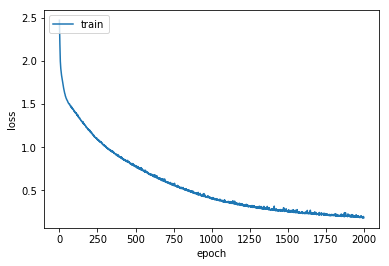

50/50 [==============================] - 0s 1ms/step
acc: 92.00%


In [17]:
# 6. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# 7. 모델 평가하기
scores = model.evaluate(x_train, y_train)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

In [18]:
# 8. 모델 사용하기

pred_count = 50 # 최대 예측 개수 정의

# 한 스텝 예측

seq_out = ['g8', 'e8', 'e4', 'f8']
pred_out = model.predict(x_train)

In [19]:
for i in range(pred_count):
    idx = np.argmax(pred_out[i]) # one-hot 인코딩을 인덱스 값으로 변환
    seq_out.append(idx2code[idx]) # seq_out는 최종 악보이므로 인덱스 값을 코드로 변환하여 저장
    
print("one step prediction : ", seq_out)

one step prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'e8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'f4', 'e8', 'e8', 'e8', 'e8', 'f8', 'f8', 'd8', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']


In [20]:
# 곡 전체 예측

seq_in = ['g8', 'e8', 'e4', 'f8']
seq_out = seq_in
seq_in = [code2idx[it] / float(max_idx_value) for it in seq_in] # 코드를 인덱스값으로 변환

for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1, 4)) # batch_size, feature
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    seq_in.append(idx / float(max_idx_value))
    seq_in.pop(0)

print("full song prediction : ", seq_out)

full song prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8']


In [24]:
model = Sequential()
model.add(LSTM(128, input_shape = (4, 1)))
model.add(Dense(one_hot_vec_size, activation='softmax'))

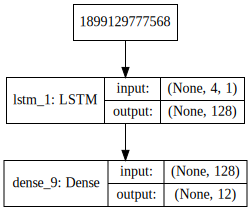

In [25]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [26]:
x_train = np.reshape(x_train, (50, 4, 1)) # 샘플 수, 타임스텝 수, 속성 수

In [27]:
dataset = seq2dataset(seq, window_size = 4)

In [28]:
print(dataset.shape)

# 입력(X)과 출력(Y) 변수로 분리하기
x_train = dataset[:,0:4]
y_train = dataset[:,4]

max_idx_value = 13

# 입력값 정규화 시키기
x_train = x_train / float(max_idx_value)

(50, 5)


In [29]:
# 입력을 (샘플 수, 타입스텝, 특성 수)로 형태 변환
x_train = np.reshape(x_train, (50, 4, 1))

# 라벨값에 대한 one-hot 인코딩 수행
y_train = np_utils.to_categorical(y_train)

one_hot_vec_size = y_train.shape[1]

print("one hot encoding vector size is ", one_hot_vec_size)

one hot encoding vector size is  12


In [30]:
# 4. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
history = LossHistory() # 손실 이력 객체 생성
history.init()

# 5. 모델 학습시키기
model.fit(x_train, y_train, epochs=2000, batch_size=14, verbose=2, callbacks=[history])

Epoch 1/2000
 - 1s - loss: 2.4844 - acc: 0.1400
Epoch 2/2000
 - 0s - loss: 2.4476 - acc: 0.2000
Epoch 3/2000
 - 0s - loss: 2.4087 - acc: 0.3400
Epoch 4/2000
 - 0s - loss: 2.3671 - acc: 0.3400
Epoch 5/2000
 - 0s - loss: 2.3140 - acc: 0.3400
Epoch 6/2000
 - 0s - loss: 2.2517 - acc: 0.3400
Epoch 7/2000
 - 0s - loss: 2.1808 - acc: 0.3400
Epoch 8/2000
 - 0s - loss: 2.0991 - acc: 0.3400
Epoch 9/2000
 - 0s - loss: 2.0222 - acc: 0.3400
Epoch 10/2000
 - 0s - loss: 1.9825 - acc: 0.3400
Epoch 11/2000
 - 0s - loss: 1.9748 - acc: 0.3400
Epoch 12/2000
 - 0s - loss: 1.9581 - acc: 0.3400
Epoch 13/2000
 - 0s - loss: 1.9419 - acc: 0.3400
Epoch 14/2000
 - 0s - loss: 1.9250 - acc: 0.3400
Epoch 15/2000
 - 0s - loss: 1.9251 - acc: 0.3400
Epoch 16/2000
 - 0s - loss: 1.9207 - acc: 0.3400
Epoch 17/2000
 - 0s - loss: 1.9203 - acc: 0.3400
Epoch 18/2000
 - 0s - loss: 1.9132 - acc: 0.3400
Epoch 19/2000
 - 0s - loss: 1.9065 - acc: 0.3400
Epoch 20/2000
 - 0s - loss: 1.9013 - acc: 0.3400
Epoch 21/2000
 - 0s - loss: 1

Epoch 168/2000
 - 0s - loss: 1.5793 - acc: 0.4400
Epoch 169/2000
 - 0s - loss: 1.5779 - acc: 0.4400
Epoch 170/2000
 - 0s - loss: 1.5640 - acc: 0.4400
Epoch 171/2000
 - 0s - loss: 1.5826 - acc: 0.3600
Epoch 172/2000
 - 0s - loss: 1.5742 - acc: 0.4000
Epoch 173/2000
 - 0s - loss: 1.5643 - acc: 0.4400
Epoch 174/2000
 - 0s - loss: 1.5652 - acc: 0.4400
Epoch 175/2000
 - 0s - loss: 1.5661 - acc: 0.4400
Epoch 176/2000
 - 0s - loss: 1.5632 - acc: 0.4400
Epoch 177/2000
 - 0s - loss: 1.5714 - acc: 0.3800
Epoch 178/2000
 - 0s - loss: 1.5643 - acc: 0.3600
Epoch 179/2000
 - 0s - loss: 1.5521 - acc: 0.4200
Epoch 180/2000
 - 0s - loss: 1.5469 - acc: 0.4400
Epoch 181/2000
 - 0s - loss: 1.5474 - acc: 0.4400
Epoch 182/2000
 - 0s - loss: 1.5464 - acc: 0.4800
Epoch 183/2000
 - 0s - loss: 1.5397 - acc: 0.4800
Epoch 184/2000
 - 0s - loss: 1.5416 - acc: 0.4000
Epoch 185/2000
 - 0s - loss: 1.5670 - acc: 0.4000
Epoch 186/2000
 - 0s - loss: 1.5366 - acc: 0.4400
Epoch 187/2000
 - 0s - loss: 1.5482 - acc: 0.3800


Epoch 332/2000
 - 0s - loss: 1.2767 - acc: 0.5800
Epoch 333/2000
 - 0s - loss: 1.2644 - acc: 0.5800
Epoch 334/2000
 - 0s - loss: 1.2625 - acc: 0.5400
Epoch 335/2000
 - 0s - loss: 1.2683 - acc: 0.5800
Epoch 336/2000
 - 0s - loss: 1.2666 - acc: 0.5600
Epoch 337/2000
 - 0s - loss: 1.2528 - acc: 0.6000
Epoch 338/2000
 - 0s - loss: 1.2683 - acc: 0.5800
Epoch 339/2000
 - 0s - loss: 1.2511 - acc: 0.5800
Epoch 340/2000
 - 0s - loss: 1.2692 - acc: 0.4800
Epoch 341/2000
 - 0s - loss: 1.2440 - acc: 0.5600
Epoch 342/2000
 - 0s - loss: 1.2578 - acc: 0.6000
Epoch 343/2000
 - 0s - loss: 1.2505 - acc: 0.5400
Epoch 344/2000
 - 0s - loss: 1.2614 - acc: 0.5600
Epoch 345/2000
 - 0s - loss: 1.2401 - acc: 0.5200
Epoch 346/2000
 - 0s - loss: 1.2558 - acc: 0.5800
Epoch 347/2000
 - 0s - loss: 1.2408 - acc: 0.5600
Epoch 348/2000
 - 0s - loss: 1.2489 - acc: 0.5400
Epoch 349/2000
 - 0s - loss: 1.2516 - acc: 0.5400
Epoch 350/2000
 - 0s - loss: 1.2513 - acc: 0.5800
Epoch 351/2000
 - 0s - loss: 1.2283 - acc: 0.5600


Epoch 496/2000
 - 0s - loss: 1.0019 - acc: 0.5800
Epoch 497/2000
 - 0s - loss: 0.9985 - acc: 0.5600
Epoch 498/2000
 - 0s - loss: 0.9837 - acc: 0.6200
Epoch 499/2000
 - 0s - loss: 1.0010 - acc: 0.6400
Epoch 500/2000
 - 0s - loss: 0.9956 - acc: 0.6400
Epoch 501/2000
 - 0s - loss: 0.9881 - acc: 0.6600
Epoch 502/2000
 - 0s - loss: 0.9987 - acc: 0.6000
Epoch 503/2000
 - 0s - loss: 0.9841 - acc: 0.6400
Epoch 504/2000
 - 0s - loss: 1.0057 - acc: 0.6400
Epoch 505/2000
 - 0s - loss: 0.9775 - acc: 0.6400
Epoch 506/2000
 - 0s - loss: 0.9742 - acc: 0.6400
Epoch 507/2000
 - 0s - loss: 0.9696 - acc: 0.6400
Epoch 508/2000
 - 0s - loss: 0.9819 - acc: 0.6400
Epoch 509/2000
 - 0s - loss: 0.9858 - acc: 0.6200
Epoch 510/2000
 - 0s - loss: 0.9749 - acc: 0.6400
Epoch 511/2000
 - 0s - loss: 0.9718 - acc: 0.6200
Epoch 512/2000
 - 0s - loss: 0.9766 - acc: 0.6200
Epoch 513/2000
 - 0s - loss: 0.9622 - acc: 0.6200
Epoch 514/2000
 - 0s - loss: 0.9698 - acc: 0.6600
Epoch 515/2000
 - 0s - loss: 0.9674 - acc: 0.6600


Epoch 660/2000
 - 0s - loss: 0.7417 - acc: 0.7200
Epoch 661/2000
 - 0s - loss: 0.7288 - acc: 0.7600
Epoch 662/2000
 - 0s - loss: 0.7376 - acc: 0.7400
Epoch 663/2000
 - 0s - loss: 0.7225 - acc: 0.7600
Epoch 664/2000
 - 0s - loss: 0.7272 - acc: 0.7000
Epoch 665/2000
 - 0s - loss: 0.7200 - acc: 0.7600
Epoch 666/2000
 - 0s - loss: 0.7649 - acc: 0.6800
Epoch 667/2000
 - 0s - loss: 0.7274 - acc: 0.6800
Epoch 668/2000
 - 0s - loss: 0.7579 - acc: 0.7400
Epoch 669/2000
 - 0s - loss: 0.7288 - acc: 0.7400
Epoch 670/2000
 - 0s - loss: 0.7383 - acc: 0.7200
Epoch 671/2000
 - 0s - loss: 0.7212 - acc: 0.7400
Epoch 672/2000
 - 0s - loss: 0.7549 - acc: 0.7400
Epoch 673/2000
 - 0s - loss: 0.7291 - acc: 0.7000
Epoch 674/2000
 - 0s - loss: 0.7353 - acc: 0.7000
Epoch 675/2000
 - 0s - loss: 0.7455 - acc: 0.6800
Epoch 676/2000
 - 0s - loss: 0.7209 - acc: 0.7200
Epoch 677/2000
 - 0s - loss: 0.7142 - acc: 0.7000
Epoch 678/2000
 - 0s - loss: 0.7135 - acc: 0.7000
Epoch 679/2000
 - 0s - loss: 0.7006 - acc: 0.7400


Epoch 824/2000
 - 0s - loss: 0.5948 - acc: 0.7600
Epoch 825/2000
 - 0s - loss: 0.5952 - acc: 0.7800
Epoch 826/2000
 - 0s - loss: 0.5625 - acc: 0.7400
Epoch 827/2000
 - 0s - loss: 0.5769 - acc: 0.8000
Epoch 828/2000
 - 0s - loss: 0.5704 - acc: 0.8000
Epoch 829/2000
 - 0s - loss: 0.5531 - acc: 0.8000
Epoch 830/2000
 - 0s - loss: 0.5772 - acc: 0.8200
Epoch 831/2000
 - 0s - loss: 0.5999 - acc: 0.7600
Epoch 832/2000
 - 0s - loss: 0.5994 - acc: 0.7800
Epoch 833/2000
 - 0s - loss: 0.5696 - acc: 0.8000
Epoch 834/2000
 - 0s - loss: 0.5645 - acc: 0.8400
Epoch 835/2000
 - 0s - loss: 0.5425 - acc: 0.8400
Epoch 836/2000
 - 0s - loss: 0.5493 - acc: 0.8200
Epoch 837/2000
 - 0s - loss: 0.5532 - acc: 0.8200
Epoch 838/2000
 - 0s - loss: 0.5512 - acc: 0.8200
Epoch 839/2000
 - 0s - loss: 0.5453 - acc: 0.8400
Epoch 840/2000
 - 0s - loss: 0.5969 - acc: 0.7800
Epoch 841/2000
 - 0s - loss: 0.5346 - acc: 0.8000
Epoch 842/2000
 - 0s - loss: 0.5840 - acc: 0.7800
Epoch 843/2000
 - 0s - loss: 0.5574 - acc: 0.8000


Epoch 988/2000
 - 0s - loss: 0.4702 - acc: 0.8400
Epoch 989/2000
 - 0s - loss: 0.4634 - acc: 0.8400
Epoch 990/2000
 - 0s - loss: 0.4576 - acc: 0.8600
Epoch 991/2000
 - 0s - loss: 0.4611 - acc: 0.8600
Epoch 992/2000
 - 0s - loss: 0.4975 - acc: 0.8000
Epoch 993/2000
 - 0s - loss: 0.4594 - acc: 0.8600
Epoch 994/2000
 - 0s - loss: 0.4803 - acc: 0.8400
Epoch 995/2000
 - 0s - loss: 0.4618 - acc: 0.8400
Epoch 996/2000
 - 0s - loss: 0.4854 - acc: 0.8000
Epoch 997/2000
 - 0s - loss: 0.4763 - acc: 0.8200
Epoch 998/2000
 - 0s - loss: 0.4619 - acc: 0.8600
Epoch 999/2000
 - 0s - loss: 0.4940 - acc: 0.8400
Epoch 1000/2000
 - 0s - loss: 0.4488 - acc: 0.8600
Epoch 1001/2000
 - 0s - loss: 0.5050 - acc: 0.8000
Epoch 1002/2000
 - 0s - loss: 0.4420 - acc: 0.8800
Epoch 1003/2000
 - 0s - loss: 0.4949 - acc: 0.8200
Epoch 1004/2000
 - 0s - loss: 0.4663 - acc: 0.8200
Epoch 1005/2000
 - 0s - loss: 0.4494 - acc: 0.8200
Epoch 1006/2000
 - 0s - loss: 0.4608 - acc: 0.8400
Epoch 1007/2000
 - 0s - loss: 0.4542 - acc:

Epoch 1149/2000
 - 0s - loss: 0.5090 - acc: 0.8200
Epoch 1150/2000
 - 0s - loss: 0.4195 - acc: 0.8600
Epoch 1151/2000
 - 0s - loss: 0.4453 - acc: 0.8400
Epoch 1152/2000
 - 0s - loss: 0.4525 - acc: 0.8400
Epoch 1153/2000
 - 0s - loss: 0.4184 - acc: 0.8400
Epoch 1154/2000
 - 0s - loss: 0.4597 - acc: 0.8000
Epoch 1155/2000
 - 0s - loss: 0.3975 - acc: 0.8600
Epoch 1156/2000
 - 0s - loss: 0.4580 - acc: 0.8200
Epoch 1157/2000
 - 0s - loss: 0.4744 - acc: 0.8400
Epoch 1158/2000
 - 0s - loss: 0.4308 - acc: 0.8400
Epoch 1159/2000
 - 0s - loss: 0.4345 - acc: 0.8200
Epoch 1160/2000
 - 0s - loss: 0.3978 - acc: 0.8600
Epoch 1161/2000
 - 0s - loss: 0.4111 - acc: 0.8200
Epoch 1162/2000
 - 0s - loss: 0.4004 - acc: 0.8600
Epoch 1163/2000
 - 0s - loss: 0.4017 - acc: 0.8600
Epoch 1164/2000
 - 0s - loss: 0.4047 - acc: 0.8600
Epoch 1165/2000
 - 0s - loss: 0.4166 - acc: 0.8400
Epoch 1166/2000
 - 0s - loss: 0.4103 - acc: 0.8400
Epoch 1167/2000
 - 0s - loss: 0.3966 - acc: 0.8400
Epoch 1168/2000
 - 0s - loss: 0

Epoch 1310/2000
 - 0s - loss: 0.3573 - acc: 0.8600
Epoch 1311/2000
 - 0s - loss: 0.3683 - acc: 0.8600
Epoch 1312/2000
 - 0s - loss: 0.3569 - acc: 0.8600
Epoch 1313/2000
 - 0s - loss: 0.3737 - acc: 0.8400
Epoch 1314/2000
 - 0s - loss: 0.3648 - acc: 0.8600
Epoch 1315/2000
 - 0s - loss: 0.3751 - acc: 0.8600
Epoch 1316/2000
 - 0s - loss: 0.3519 - acc: 0.8600
Epoch 1317/2000
 - 0s - loss: 0.3544 - acc: 0.8600
Epoch 1318/2000
 - 0s - loss: 0.3641 - acc: 0.8400
Epoch 1319/2000
 - 0s - loss: 0.3735 - acc: 0.8400
Epoch 1320/2000
 - 0s - loss: 0.3496 - acc: 0.8600
Epoch 1321/2000
 - 0s - loss: 0.3830 - acc: 0.8400
Epoch 1322/2000
 - 0s - loss: 0.3592 - acc: 0.8800
Epoch 1323/2000
 - 0s - loss: 0.3767 - acc: 0.8600
Epoch 1324/2000
 - 0s - loss: 0.3716 - acc: 0.8600
Epoch 1325/2000
 - 0s - loss: 0.3507 - acc: 0.8800
Epoch 1326/2000
 - 0s - loss: 0.3688 - acc: 0.8800
Epoch 1327/2000
 - 0s - loss: 0.3603 - acc: 0.8400
Epoch 1328/2000
 - 0s - loss: 0.3602 - acc: 0.8400
Epoch 1329/2000
 - 0s - loss: 0

Epoch 1471/2000
 - 0s - loss: 0.3832 - acc: 0.8600
Epoch 1472/2000
 - 0s - loss: 0.3916 - acc: 0.8600
Epoch 1473/2000
 - 0s - loss: 0.3634 - acc: 0.8800
Epoch 1474/2000
 - 0s - loss: 0.3570 - acc: 0.8400
Epoch 1475/2000
 - 0s - loss: 0.3399 - acc: 0.9000
Epoch 1476/2000
 - 0s - loss: 0.3405 - acc: 0.8600
Epoch 1477/2000
 - 0s - loss: 0.3406 - acc: 0.8400
Epoch 1478/2000
 - 0s - loss: 0.3431 - acc: 0.8800
Epoch 1479/2000
 - 0s - loss: 0.3360 - acc: 0.8400
Epoch 1480/2000
 - 0s - loss: 0.3410 - acc: 0.8800
Epoch 1481/2000
 - 0s - loss: 0.3313 - acc: 0.8800
Epoch 1482/2000
 - 0s - loss: 0.3264 - acc: 0.8600
Epoch 1483/2000
 - 0s - loss: 0.3283 - acc: 0.8600
Epoch 1484/2000
 - 0s - loss: 0.3334 - acc: 0.8400
Epoch 1485/2000
 - 0s - loss: 0.3300 - acc: 0.8400
Epoch 1486/2000
 - 0s - loss: 0.3333 - acc: 0.8600
Epoch 1487/2000
 - 0s - loss: 0.3329 - acc: 0.8600
Epoch 1488/2000
 - 0s - loss: 0.3338 - acc: 0.8600
Epoch 1489/2000
 - 0s - loss: 0.3517 - acc: 0.8400
Epoch 1490/2000
 - 0s - loss: 0

Epoch 1632/2000
 - 0s - loss: 0.3220 - acc: 0.8600
Epoch 1633/2000
 - 0s - loss: 0.3114 - acc: 0.8400
Epoch 1634/2000
 - 0s - loss: 0.3435 - acc: 0.8600
Epoch 1635/2000
 - 0s - loss: 0.2918 - acc: 0.9000
Epoch 1636/2000
 - 0s - loss: 0.3450 - acc: 0.8800
Epoch 1637/2000
 - 0s - loss: 0.3046 - acc: 0.9000
Epoch 1638/2000
 - 0s - loss: 0.3407 - acc: 0.8600
Epoch 1639/2000
 - 0s - loss: 0.2998 - acc: 0.8800
Epoch 1640/2000
 - 0s - loss: 0.3351 - acc: 0.8600
Epoch 1641/2000
 - 0s - loss: 0.3462 - acc: 0.8600
Epoch 1642/2000
 - 0s - loss: 0.3157 - acc: 0.8600
Epoch 1643/2000
 - 0s - loss: 0.3385 - acc: 0.9000
Epoch 1644/2000
 - 0s - loss: 0.3353 - acc: 0.8600
Epoch 1645/2000
 - 0s - loss: 0.3462 - acc: 0.8800
Epoch 1646/2000
 - 0s - loss: 0.3273 - acc: 0.8600
Epoch 1647/2000
 - 0s - loss: 0.3326 - acc: 0.8600
Epoch 1648/2000
 - 0s - loss: 0.3389 - acc: 0.8400
Epoch 1649/2000
 - 0s - loss: 0.3227 - acc: 0.8600
Epoch 1650/2000
 - 0s - loss: 0.3252 - acc: 0.8800
Epoch 1651/2000
 - 0s - loss: 0

Epoch 1793/2000
 - 0s - loss: 0.3043 - acc: 0.8400
Epoch 1794/2000
 - 0s - loss: 0.3063 - acc: 0.8600
Epoch 1795/2000
 - 0s - loss: 0.3034 - acc: 0.8600
Epoch 1796/2000
 - 0s - loss: 0.3027 - acc: 0.8600
Epoch 1797/2000
 - 0s - loss: 0.2928 - acc: 0.8800
Epoch 1798/2000
 - 0s - loss: 0.2904 - acc: 0.9000
Epoch 1799/2000
 - 0s - loss: 0.2968 - acc: 0.8400
Epoch 1800/2000
 - 0s - loss: 0.2921 - acc: 0.8600
Epoch 1801/2000
 - 0s - loss: 0.2962 - acc: 0.8800
Epoch 1802/2000
 - 0s - loss: 0.2995 - acc: 0.8800
Epoch 1803/2000
 - 0s - loss: 0.3019 - acc: 0.9000
Epoch 1804/2000
 - 0s - loss: 0.2940 - acc: 0.9000
Epoch 1805/2000
 - 0s - loss: 0.2948 - acc: 0.8800
Epoch 1806/2000
 - 0s - loss: 0.2980 - acc: 0.8600
Epoch 1807/2000
 - 0s - loss: 0.2947 - acc: 0.8600
Epoch 1808/2000
 - 0s - loss: 0.2930 - acc: 0.8400
Epoch 1809/2000
 - 0s - loss: 0.3006 - acc: 0.8800
Epoch 1810/2000
 - 0s - loss: 0.2979 - acc: 0.8600
Epoch 1811/2000
 - 0s - loss: 0.2917 - acc: 0.8600
Epoch 1812/2000
 - 0s - loss: 0

Epoch 1954/2000
 - 0s - loss: 0.2972 - acc: 0.8600
Epoch 1955/2000
 - 0s - loss: 0.2914 - acc: 0.8800
Epoch 1956/2000
 - 0s - loss: 0.2825 - acc: 0.9000
Epoch 1957/2000
 - 0s - loss: 0.2879 - acc: 0.9000
Epoch 1958/2000
 - 0s - loss: 0.2893 - acc: 0.9000
Epoch 1959/2000
 - 0s - loss: 0.2831 - acc: 0.9000
Epoch 1960/2000
 - 0s - loss: 0.2793 - acc: 0.8800
Epoch 1961/2000
 - 0s - loss: 0.2874 - acc: 0.8600
Epoch 1962/2000
 - 0s - loss: 0.2802 - acc: 0.9000
Epoch 1963/2000
 - 0s - loss: 0.2858 - acc: 0.8600
Epoch 1964/2000
 - 0s - loss: 0.3038 - acc: 0.8800
Epoch 1965/2000
 - 0s - loss: 0.2736 - acc: 0.9000
Epoch 1966/2000
 - 0s - loss: 0.3042 - acc: 0.8600
Epoch 1967/2000
 - 0s - loss: 0.3208 - acc: 0.8400
Epoch 1968/2000
 - 0s - loss: 0.3019 - acc: 0.8400
Epoch 1969/2000
 - 0s - loss: 0.2946 - acc: 0.9000
Epoch 1970/2000
 - 0s - loss: 0.3018 - acc: 0.9000
Epoch 1971/2000
 - 0s - loss: 0.2925 - acc: 0.8600
Epoch 1972/2000
 - 0s - loss: 0.3105 - acc: 0.8600
Epoch 1973/2000
 - 0s - loss: 0

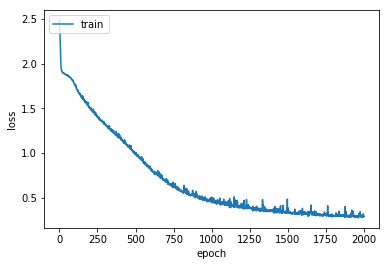

50/50 [==============================] - 0s 2ms/step
acc: 90.00%


In [32]:
# 6. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# 7. 모델 평가하기
scores = model.evaluate(x_train, y_train)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

In [33]:
# 8. 모델 사용하기

pred_count = 50 # 최대 예측 개수 정의

# 한 스텝 예측

seq_out = ['g8', 'e8', 'e4', 'f8']
pred_out = model.predict(x_train)

for i in range(pred_count):
    idx = np.argmax(pred_out[i]) # one-hot 인코딩을 인덱스 값으로 변환
    seq_out.append(idx2code[idx]) # seq_out는 최종 악보이므로 인덱스 값을 코드로 변환하여 저장
    
print("one step prediction : ", seq_out)

one step prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'g4', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'f4', 'e8', 'e8', 'e8', 'e8', 'f8', 'f8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']


In [34]:
seq_in = ['g8', 'e8', 'e4', 'f8']
seq_out = seq_in
seq_in = [code2idx[it] / float(max_idx_value) for it in seq_in] # 코드를 인덱스값으로 변환

In [35]:
for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1, 4, 1)) # 샘플 수, 타입스텝 수, 속성 수
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    seq_in.append(idx / float(max_idx_value))
    seq_in.pop(0)

print("full song prediction : ", seq_out)

full song prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8']


In [36]:
model = Sequential()
model.add(LSTM(128, batch_input_shape = (1, 4, 1), stateful=True))
model.add(Dense(one_hot_vec_size, activation='softmax'))

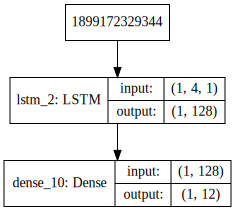

In [37]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [ ]:
num_epochs = 2000

for epoch_idx in range(num_epochs):
    print ('epochs : ' + str(epoch_idx) )
    model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2, shuffle=False) # 50 is X.shape[0]
    model.reset_states()